# Create data set `townhouses`

In [1]:
import pandas as pd

from numpy import nan

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
ames = pd.read_csv("data_stg1/AmesHousing.csv")

## Apply "townhouse conditions"

In [3]:
# Define basic conditions
conditions = ((ames['Bldg Type'].isin(['TwnhsE', 'Twnhs'])) &      # only townhouses
              (ames['Functional'].isin(['Typ', 'Min1', 'Min2'])) & # home functionality: Typical or minor deductions
              (ames['Bedroom AbvGr'] >= 1) &                       # bedroom (above grade): at least 1
              (ames['Kitchen AbvGr'] >= 1) &                       # kitchen (above grade): at least 1
              (ames['Overall Qual'] >= 5) &                        # material and finish: average or better
              (ames['Overall Cond'] >= 5)                          # overall condition: average or better)
             )

# Apply basic conditions
townhouses = ames.loc[ames[conditions].index, :]                 

# Create new columns
townhouses['Full Bathrooms'] = townhouses['Bsmt Full Bath'] + townhouses['Full Bath']
townhouses['Half Bathrooms'] = townhouses['Bsmt Half Bath'] + townhouses['Half Bath']

## Get rid off categories with too few values

### Categorical variables 1/2

#### Explore

In [4]:
pd.crosstab(townhouses['Full Bathrooms'], townhouses['Half Bathrooms'])

Half Bathrooms,0.0,1.0,2.0,4.0
Full Bathrooms,,,,
0.0,0,0,0,1
1.0,5,29,2,0
2.0,91,66,2,0
3.0,70,31,0,0
4.0,1,0,0,0


#### Adjust

In [5]:
townhouses = townhouses[(townhouses['Full Bathrooms'].between(1,3)) &
                        (townhouses['Half Bathrooms'].between(0,1))
                       ]

#### Check out adjusted data

In [6]:
pd.crosstab(townhouses['Full Bathrooms'], townhouses['Half Bathrooms'])

Half Bathrooms,0.0,1.0
Full Bathrooms,,
1.0,5,29
2.0,91,66
3.0,70,31


### Categorical variables 2/2

#### Explore

In [7]:
for col in ['Functional',  'Overall Qual', 'Overall Cond', 'House Style',
            'Bedroom AbvGr',
            'Kitchen AbvGr', 'Kitchen Qual',
            'Garage Type',
            'Fireplaces']:
    print(townhouses[col].value_counts(dropna=False), "\n")

Typ     288
Min1      4
Name: Functional, dtype: int64 

6     105
7      82
8      63
9      21
5      20
10      1
Name: Overall Qual, dtype: int64 

5    246
6     36
7      8
9      1
8      1
Name: Overall Cond, dtype: int64 

1Story    183
2Story     99
SFoyer      6
SLvl        3
1.5Fin      1
Name: House Style, dtype: int64 

2    190
1     50
3     48
4      4
Name: Bedroom AbvGr, dtype: int64 

1    292
Name: Kitchen AbvGr, dtype: int64 

Gd    178
TA     85
Ex     29
Name: Kitchen Qual, dtype: int64 

Attchd     208
Detchd      68
Basment      7
BuiltIn      6
NaN          3
Name: Garage Type, dtype: int64 

1    156
0    129
2      6
3      1
Name: Fireplaces, dtype: int64 



#### Adjust

In [8]:
townhouses = townhouses[(townhouses['Bedroom AbvGr'].between(1, 3)) &
                        (townhouses['Garage Type'].isin(['Attchd', 'Detchd'])) &
                        (townhouses['House Style'].isin(['1Story', '2Story'])) &
                        (townhouses['Fireplaces'].between(0, 1))
                       ]

#### Check out adjusted data

In [9]:
for col in ['Functional',  'Overall Qual', 'Overall Cond', 'House Style',
            'Bedroom AbvGr',
            'Kitchen AbvGr', 'Kitchen Qual',
            'Garage Type',
            'Fireplaces']:
    print(townhouses[col].value_counts(dropna=False), "\n")

Typ     259
Min1      4
Name: Functional, dtype: int64 

6     95
7     74
8     58
9     21
5     14
10     1
Name: Overall Qual, dtype: int64 

5    226
6     30
7      6
8      1
Name: Overall Cond, dtype: int64 

1Story    177
2Story     86
Name: House Style, dtype: int64 

2    177
3     43
1     43
Name: Bedroom AbvGr, dtype: int64 

1    263
Name: Kitchen AbvGr, dtype: int64 

Gd    167
TA     70
Ex     26
Name: Kitchen Qual, dtype: int64 

Attchd    197
Detchd     66
Name: Garage Type, dtype: int64 

1    152
0    111
Name: Fireplaces, dtype: int64 



### Continuous variables

#### Explore

Lot Area


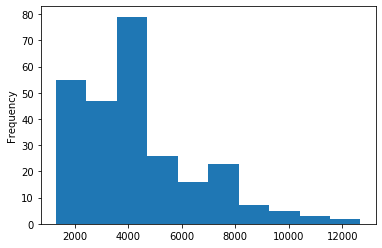

First 5 smallest values (including NaNs):
935     1300
933     1488
934     1612
407     1680
1040    1680
Name: Lot Area, dtype: int64 


Total Bsmt SF


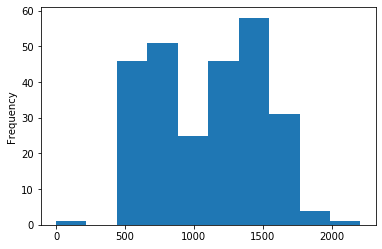

First 5 smallest values (including NaNs):
2887      0.0
1041    483.0
405     483.0
406     483.0
1040    483.0
Name: Total Bsmt SF, dtype: float64 


SalePrice


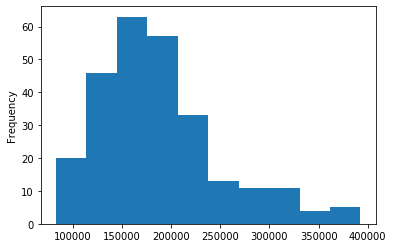

First 5 smallest values (including NaNs):
2361    83000
1043    85400
31      88000
2365    89000
2367    94500
Name: SalePrice, dtype: int64 




In [10]:
for col in ['Lot Area', 'Total Bsmt SF', 'SalePrice']:
    
    print(col)
    print("="*len(col))
    
    townhouses[col].plot(kind='hist')
    plt.show()
    
    print("First 5 smallest values (including NaNs):")
    print(townhouses[col].sort_values(na_position='first')[:5], "\n\n")

#### Adjust

In [11]:
townhouses = townhouses[townhouses['Total Bsmt SF'] > 0]

#### Check out adjusted data

Lot Area


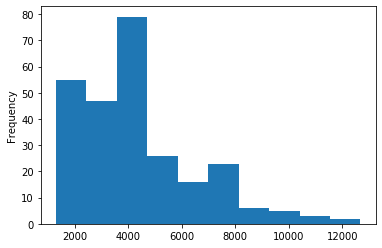

First 5 smallest values (including NaNs):
935     1300
933     1488
934     1612
407     1680
1040    1680
Name: Lot Area, dtype: int64 


Total Bsmt SF


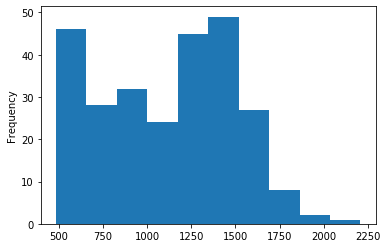

First 5 smallest values (including NaNs):
406     483.0
405     483.0
402     483.0
29      483.0
1040    483.0
Name: Total Bsmt SF, dtype: float64 


SalePrice


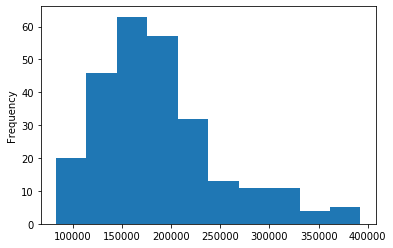

First 5 smallest values (including NaNs):
2361    83000
1043    85400
31      88000
2365    89000
2367    94500
Name: SalePrice, dtype: int64 




In [12]:
for col in ['Lot Area', 'Total Bsmt SF', 'SalePrice']:
    
    print(col)
    print("="*len(col))
    
    townhouses[col].plot(kind='hist')
    plt.show()
    
    print("First 5 smallest values (including NaNs):")
    print(townhouses[col].sort_values(na_position='first')[:5], "\n\n")

## Write final DataFrame to CSV

In [13]:
cols = [# Discrete 
        'Year Built',     
        'Year Remod/Add',
        'Yr Sold',
        'Full Bathrooms',
        'Half Bathrooms',
        'Bedroom AbvGr',
        'Kitchen AbvGr',
        'Fireplaces',
        
        # Ordinal
        'Functional',
        'Overall Qual',
        'Overall Cond',
        'Kitchen Qual',
    
        # Nominal
        'House Style',
        'Garage Type',
        
        # Continuous
        'Lot Area',      # Lot size (sf)
        'Total Bsmt SF', # Total basement area (sf)
        'SalePrice'      # Sale price ($)
       ]

townhouses[cols].to_csv('data_stg2/ames_townhouses.csv', index=False)